<div style="text-align: center; font-weight: bold; font-size: 32px; border-top: 3px solid white; border-bottom: 3px solid white; padding: 10px;">
    Toy Monte Carlo
</div>

## I. Génération de nombres aléatoires selon une distribution donnée

### a) Méthode Toy Monte-Carlo

Commençons par découvrir une première méthode pour générer des nombres aléatoires suivant une distribution donnée : la méthode **Toy Monte-Carlo**.
La génération de nombres aléatoires selon une distribution uniforme est relativement simple. Pour cela, il suffit de **répartir des points de manière uniforme sur un plan.**

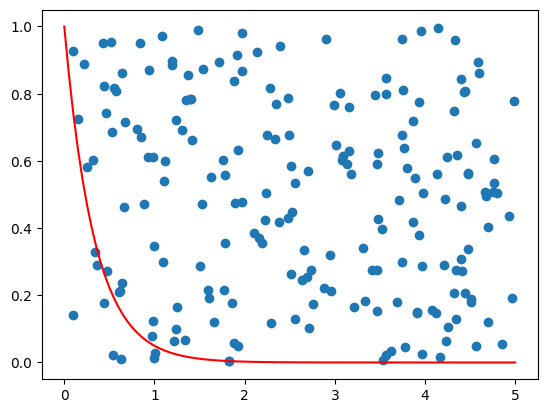

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Fonction de Densité de Probabilité (PDF)
def f(x, A=1, c=3):
    return A * np.exp(-c*x)

X = []
Y = []

# Génération de nombres aléatoires
for _ in range(0,200):
    x = random.uniform(0,5)
    y = random.uniform(0,1)
    X.append(x)
    Y.append(y)

plt.scatter(X,Y, label='Points générés')
plt.plot(np.linspace(0,5,100), f(np.linspace(0,5,100)), 'r', label='Fonction f')
plt.show()

Cependant, afin que la distribution suive celle de la densité de probabilité $f$, il ne faut conserver que les points situés sous sa courbe. En termes de surface, cela signifie que le rapport entre le nombre de points sous la courbe, et le nombre total de points générés, est proportionnel à l'aire sous la courbe par rapport à l'aire totale du rectangle délimité par les bornes de la génération uniforme.

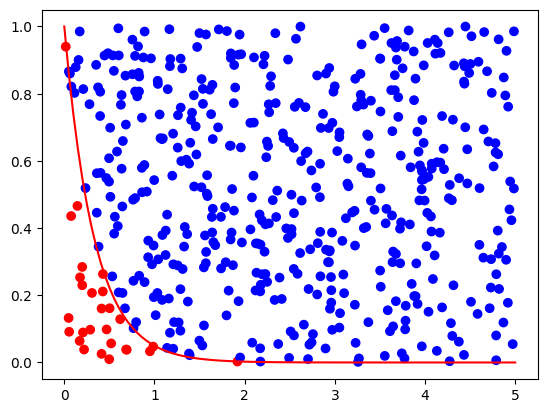

In [2]:
# Nous répétons le processus de génération
colors = []
X = []
Y = []
for _ in range(0,500):
    x = random.uniform(0,5)
    y = random.uniform(0,1)
    X.append(x)
    Y.append(y)
    
    # Nous donnons une couleur différente aux points sélectionnés
    if y < f(x):
        colors.append('r')
    else:
        colors.append('b')

plt.scatter(X,Y, c=colors, label='Points générés')
plt.plot(np.linspace(0,5,100), f(np.linspace(0,5,100)), 'r', label='Fonction f')
plt.show()

In [3]:
print(f"Points conservés : {(colors.count('r')/len(X) * 100):.2f} %")

Points conservés : 5.40 %


Un inconvénient de cette approche est son efficacité réduite. En effet, ne conservant qu'une petite partie des points générés, nous perdons une grande partie des données. Une amélioration possible consiste à ne générer que des points d'ordonnée $y$ inférieure au maximum de $f(x)$ sur l'intervalle $[0,5]$.

<div style="text-align: center; font-weight: bold; font-size: 20px; display: flex; align-items: center; justify-content: center;">
    <span>Exemple</span> <span style="flex-grow: 1; height: 3px; background-color: grey; margin-left: 10px;"></span>
</div>

#### Définition de la fonction de densité de probabilité $f$ et des constantes

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

def f(x, A, c):
    return A * np.exp(-c*x)

# Bornes de la PDF
a,b = (0,5)
interval = (a,b)


# Calcul de la constante d'intégration afin que P(a<X<b) = 1
c = 3
A = c / (1 - np.exp(-15))

X = []
Y = []

nb_points = 5000
nb_points_generes = 0

#### Génération des points qui suivent la distribution de $f$

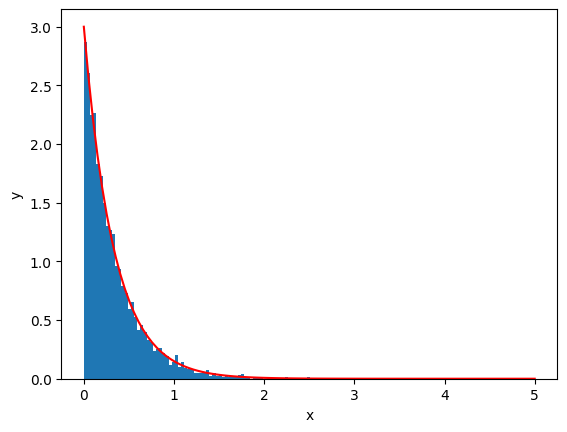

In [5]:
# Maximum de f sur l'intervalle [a,b]
x = np.linspace(0,5,100)
y = f(x, A, c)
max_y = max(y)

# Nous ne gardons que les x dont l'image est sous la courbe de la PDF
while len(X) < nb_points:
    x = random.uniform(0,5)
    y = random.uniform(0,max_y)
    nb_points_generes += 1
    if y < f(x, A, c):
        X.append(x)

plt.hist(X, bins=80, density=True, label='Histogramme')
plt.plot(np.linspace(0,5,100), f(np.linspace(0,5,100), A, c), 'r', label='Fonction f')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Calcul de l'éfficacité

In [6]:
print(f"Effectif total : {(len(X)/nb_points_generes *100):.2f} %")

Effectif total : 6.70 %


<hr style="border: none; height: 3px; background-color: white;">

### b) Méthode $F^{-1}$

Une méthode plus efficace que la précédent, car garantissant une efficacité de 100%, est la méthode dite $F^{-1}$. Elle repose sur l'utilisation de l'inverse de la fonction de répartition, ce qui garantit que chaque valeur générée **respecte exactement la distribution cible**, sans perte de points inutiles.

Soit $f : [a,b] \to \mathbb{R}$, une densité de probabilité donnée. La méthode $F^{-1}$ se divise en trois étapes :

- Définir la primitive $F$ de la densité de probabilité $f$, aussi appelée fonction de répartition :

$$F(x) = \int_{a}^{x} f(t) \, dt$$

- Trouver son inverse $F^{-1}$, qui existe nécessairement car $F:[0,1] \to [a,b]$ est bijective

- Générer un nombre aléatoire $y$ suivant une distribution uniforme sur $[0,1]$, puis trouver $x$ à l’aide de $F^{-1}$ :

$$x = F^{-1}(y)$$

Ainsi, $x$ suit la distribution donnée par $f$.

<div style="text-align: center; font-weight: bold; font-size: 20px; display: flex; align-items: center; justify-content: center;">
    <span>Exemple</span> <span style="flex-grow: 1; height: 3px; background-color: grey; margin-left: 10px;"></span>
</div>


#### Définition des fonctions $F$ et $F^{-1}$ et des constantes

In [7]:
nb_points_generes = 0

def F(x, interval, A, c):
    a, b = interval
    return -A/c * np.exp(-c*x) + A/c * np.exp(-c*a)

def F_1(y, interval, A, c):
    a, b = interval
    return -1/c*np.log(-c/A * (y - A/c * np.exp(-c*a)))

X = []

#### Génération des points suivant la distribution de $f$ via la méthode $F^{-1}$

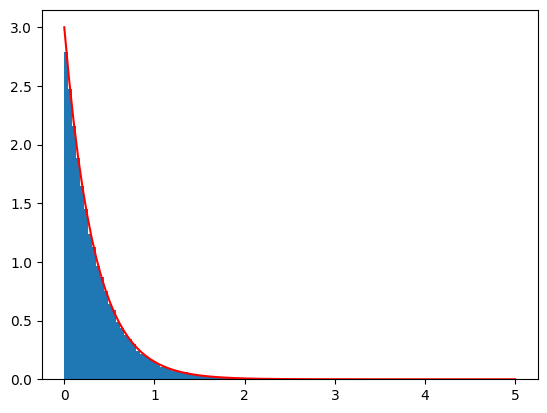

In [8]:
for _ in range(0,100_000):
    nb_points_generes += 1
    y = random.uniform(0,1)
    X.append(F_1(y, interval, A, c))
    
plt.hist(X, bins=100, density=True)
plt.plot(np.linspace(0,5,100), f(np.linspace(0,5,100), A, c), 'r')
plt.show()

#### Calcul de l'efficacité

In [9]:
print(f"Effectif total : {len(X)/nb_points_generes *100} %")

Effectif total : 100.0 %


<hr style="border: none; height: 3px; background-color: grey;">

## II. Simulation de données expérimentales

En physique expérimentale, il est courant de rencontrer des échantillons de données $(x_i, y_i)$, pour $i=1,2,...,n$, suivant une tendance affine, c'est-à-dire dont le modèle théorique est de la forme $y_{th} = f(x_i, \vec{a}) = ax_i + b$, où $\vec{a}$ est un vecteur comprenant les coefficients a (coefficient directeur) et b (ordonnée à l'origine) :

In [10]:
def model(a, b, x):
    return a*x + b

Nous allons simuler des données expérimentales $y_{exp}$ pour un modèle de régression linéaire en utilisant un modèle linéaire simple de paramètres $a = 2$ et $b = 1$, auquel nous ajouterons un bruit gaussien pour les rendre plus réalistes. Nous définirons ce dernier avec une moyenne nulle, ainsi qu'un écart-type imposé $\sigma_i = 0.1 y_{th, i}$ pour chaque $y_{exp, i}$.


Générons 1000 expériences contenant chacune 10 points de données (pour $x$ dans l'intervalle $[1, 10]$), et représentons graphiquement les résultats de l'une d'entre-elles.

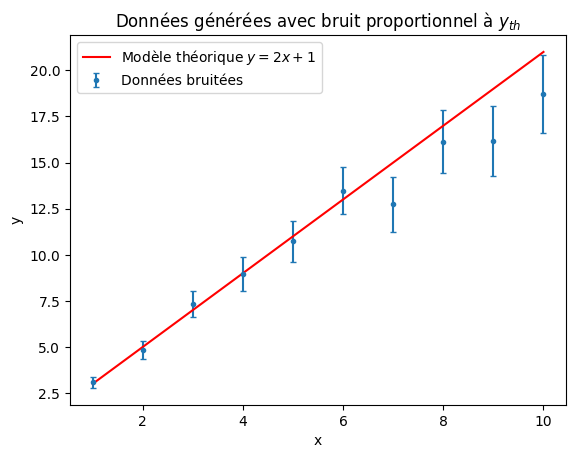

In [11]:
def sigma(y_th):
    return 0.1 * y_th

def gen_data(n, a, b, sigma):
    x_exp = np.linspace(1, 10, n)
    y_th = model(a, b, x_exp)
    sigmas = sigma(y_th)
    
    y_exp = y_th + np.random.normal(0, sigmas)
    
    return x_exp, y_exp, sigmas

x_exp, y_exp, sigmas = gen_data(10, 2, 1, sigma)

plt.errorbar(x_exp, y_exp, yerr=sigmas, fmt='.', capsize=2, label='Données bruitées')
plt.plot(x_exp, model(2, 1, x_exp), 'r', label='Modèle théorique $y = 2x + 1$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Données générées avec bruit proportionnel à $y_{th}$')
plt.show()

Nous constatons que les valeurs expérimentales, comme attendu, suivent effectivement avec plus ou moins de proximité le tracé du modèle. Cependant, à moins de souhaiter vérifier la robustesse d'un modèle face aux données empiriques, il est peu courant de connaître à l'avance les coefficients $a$ et $b$ lors de l'expérience. Dans ce cas de figure, il est donc utile de calculer la valeur des paramètres permettant l'approximation la plus fidèle de ces données.

<hr style="border: none; height: 3px; background-color: grey;">

## III. Ajustement

L'objectif général est de reconstruire le modèle sous-jacent à partir des données expérimentales générées ci-dessus.

Pour n'importe quel jeu de données, il est possible de trouver la meilleure approximation affine, c'est-à-dire la droite dont la distance à chaque point est minimale. Cependant, nous pouvons légitimement nous demander si cette droite est réellement la courbe la plus adaptée au modèle.

### a) Calcul des $z_i$

Une première intuition afin d'estimer si le modèle coincide avec les données est de calculer la différence entre les valeurs expérimentales théoriques, c'est-à-dire $y_i - y_{th}(x_i, \vec{a})$.

Cependant, cette différence n'incluant pas l'incertitude sur $y_i$, nous introduisons la quantité suivante, permettant plus de simplicité dans l'analyse des fluctuations des $y_i$ :

$$ z_i = \frac{y_i - y_{th}(x_i, \vec{a})}{\sigma_i}$$

Remarquons que les $z_i$ correspondent à des variables aléatoires suivant une loi gaussienne **centrée réduite** $\mathcal{N}(0,1)$, normalisée par $\sigma_i$ : en effet, lorsque la correspondance au modèle est parfait, $y_i - y_{th}(x_i, \vec{\theta}) = 0$. Statistiquement parlant, elles représentent à quel point il est possible d'obtenir des données pires que celles que nous avons déjà observées. Voici donc l'interprétation que nous en ferons :

- Si $z_i \approx 0$, alors la mesure $y_{exp, i}$ est proche de la prédiction $y_{th, i}$, indiquant une bonne cohérence du modèle ;
- Si $|z_i|$ est grand, l'écart entre la mesure et la prédiction est important par rapport à $\sigma_i$, ce qui peut signaler une incompatibilité entre les données et le modèle.

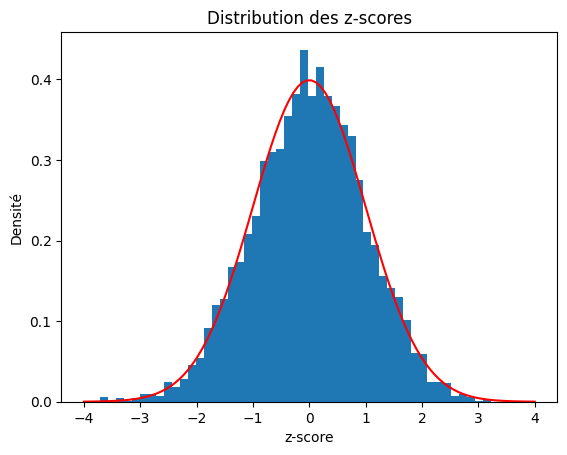

In [12]:
xs, ys, sigmas_s = gen_data(5000, 2, 1, sigma)
y_th_s = model(2, 1, xs)

z = (ys - y_th_s) / sigmas_s

plt.hist(z, bins=50, density=True)
plt.plot(np.linspace(-4,4,100), 1/np.sqrt(2*np.pi)*np.exp(-0.5*np.linspace(-4,4,100)**2), 'r')
plt.title("Distribution des z-scores")
plt.xlabel("z-score")
plt.ylabel("Densité")
plt.show()

### b) P-value

La **p-value** mesure, dans le cadre de l'hypothèse nulle, c'est-à-dire en supposant qu'il n'y a pas de relation entre $x_i$ et $y_i$ (donc $\vec{a} = \vec{0}$), la probabilité d'obtenir, par le biais d'un ajustement, des paramètres affines au moins aussi extrêmes ou pires que ceux du modèle. Plus cette dernière est faible, moins il est probable d'obtenir un résultat différent que celui que nous avons supposé, suggérant donc que le modèle est de mauvaise qualité.

Dans notre exercice de modélisation, par exemple, une p-value faible signifierait que sous l'hypothèse nulle, il serait très improbable d'obtenir une pente aussi extrême que $a = 2$, confirmant l'absence de relation affine entre les échantillons de données $(x_i, y_i)$.

En clair, la p-value mesure à quel point les données sont **compatibles avec le modèle.**

Dans notre cas, nous pouvons calculer la p-value via l'intégration de la distribution gaussienne centrée réduite de $z_i$, soit : 

$$p = \int_{z_i}^{+\infty} \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}} dz = 2 \int_{|z_i|}^{+\infty} \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}} dz$$ 

car la gaussienne est symétrique.

Pour n échantillons de donnés, la p-value totale correspond au produit des p-values de chaque set de données : nous pouvons ensuite estimer la compatibilité de l'ensemble de données avec le modèle en maximisant cette p-value totale. Cependant, ce processus demande un temps de calcul long, car il calcule pour chaque donnée l'intégrale de la gaussienne, ce qui est plutôt fastidieux.

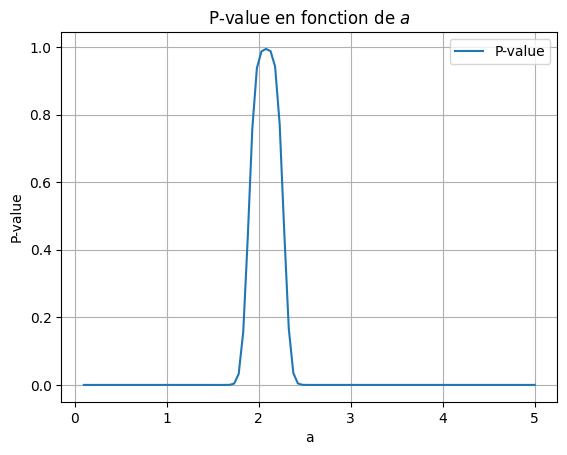

Valeur maximale de p-value : 9.941e-01, correspondant à a = 2.080


In [13]:
import scipy.stats

# Génération des données expérimentales
x_exp, y_exp, sigmas = gen_data(10, 2, 1, sigma)

# Calcul des p-values pour différentes valeurs de a
a_values = np.linspace(0.1, 5, 100)
p_values_a = []

for a_ in a_values:
    y_th = model(a_, 1, x_exp)
    z = (y_exp - y_th) / sigmas
    
    # Calcul de la p-value avec le chi2 (voir ci-dessous)
    chi2 = np.sum(z**2)
    p_value_a = scipy.stats.chi2(df=len(z)).sf(chi2)
    p_values_a.append(p_value_a)

plt.plot(a_values, p_values_a, label="P-value")
plt.xlabel('a')
plt.ylabel('P-value')
plt.title('P-value en fonction de $a$')
plt.legend()
plt.grid()
plt.show()

a_opt = a_values[np.argmax(p_values_a)]
print(f"Valeur maximale de p-value : {max(p_values_a):.3e}, correspondant à a = {a_opt:.3f}")

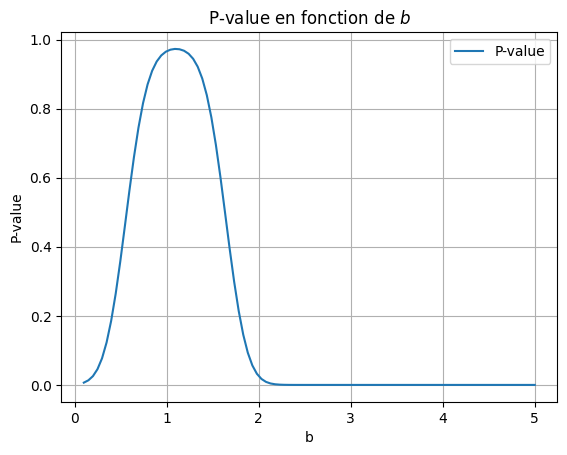

Valeur maximale de p-value : 9.729e-01, correspondant à b = 1.090


In [14]:
# Calcul des p-values pour différentes valeurs de b
b_values = np.linspace(0.1, 5, 100)
p_values_b = []

for b_ in b_values:
    y_th = model(2, b_, x_exp)
    z = (y_exp - y_th) / sigmas
    
    # Calcul de la p-value avec le chi2 (voir ci-dessous)
    chi2 = np.sum(z**2)
    p_value_b = scipy.stats.chi2(df=len(z)).sf(chi2)
    p_values_b.append(p_value_b)

plt.plot(b_values, p_values_b, label="P-value")
plt.xlabel('b')
plt.ylabel('P-value')
plt.title('P-value en fonction de $b$')
plt.legend()
plt.grid()
plt.show()

b_opt = b_values[np.argmax(p_values_b)]
print(f"Valeur maximale de p-value : {max(p_values_b):.3e}, correspondant à b = {b_opt:.3f}")

### c) Méthode des moindres carrés et loi des $\chi^2$

La gaussienne, en tant que densité de probabilité, implique que la p-value est proportionnelle à son image par $z_i$. Jusqu'à présent, nous avons cherché à maximiser le produit de ces quantités. En d'autres termes, pour maximiser la vraisemblance sur l'ensemble des données, il suffit de maximiser le produit des images de la gaussienne par $z_i$. Cela revient à maximiser l'expression suivante :

$$\prod_{i=1}^{n} \frac{1}{\sqrt{2\pi}} e^{-\frac{z_i^2}{2}} = \frac{1}{(2\pi)^{\frac{n}{2}}} e^{-\frac{1}{2} \sum_{i=1}^{n} z_i^2}$$

On observe que ce produit est proportionnel à l'exponentielle de la somme des carrés des $z_i$. Par conséquent, maximiser ce produit équivaut à maximiser $e^{-\frac{1}{2} \sum_{i=1}^{n} z_i^2}$.
Cependant, comme l'exponentielle est une fonction monotone et que l'exposant comporte un signe négatif, cela revient à **minimiser** la somme des carrés des $z_i$.

On introduit alors la quantité suivante, pilier de la **méthode des moindres carrés** notée $\chi^2 (\vec{a})$, définie comme :

$$\chi^2 (\vec{a}) = \sum_{i=1}^{n} z_i^2 = \sum_{i=1}^{n} \left( \frac{y_i - y_{th}(x_i, \vec{a})}{\sigma_i} \right)^2$$

Il s'agit d'une quantité positive mesurant la compatibilité des données avec le modèle, et tendant vers 0 pour un nombre infini de données.
Ainsi, le vecteur $\vec{a}$ minimisant la fonction $\chi^2$ contient les paramètres optimaux du modèle.

In [15]:
def chi_2(y_th, y_exp):
    
    z_2 = ((y_th - y_exp) / (0.1*y_th)) ** 2
    
    return z_2.sum()

### d) Application

Vérifions que la fonction $\chi^2$ créée ci-dessus est bien minimale pour $a \approx 2$ et $b \approx 1$. Pour cela, générons des données d'expérience pour un **grand nombre** de valeurs de ces paramètres

In [16]:
# Génération des données
x_exp, y_exp, _ = gen_data(2000, 2, 1, sigma)

# Nous réduisons les intervalles des paramètres générés autour des vraies valeurs
a_valeurs = np.linspace(1.8, 2.2, 200)
b_valeurs = np.linspace(0.8, 1.2, 200)

# Vectorisation pour optimiser le temps de calul
A, B = np.meshgrid(a_valeurs, b_valeurs, indexing="ij")

# Calcul du chi2
chi2_tab = np.zeros_like(A)
for i in range(len(a_valeurs)):
    for j in range(len(b_valeurs)):
        y_th = model(a_valeurs[i], b_valeurs[j], x_exp)
        chi2_tab[i, j] = chi_2(y_th, y_exp)

Représentons alors graphiquement les variations de $\chi^2$ en fonction des paramètres affines $(a, b)$. Pour plus de visibilité, nous travaillerons en échelle semi-logarithmique et utiliserons une carte de contours : cela devrait nous permettre d'identifier les coordonnées induisant un minimum sur la surface.

<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3897/1673759125.py:21: SyntaxWarning: invalid escape sequence '\c'
  ax.set_zlabel('$\chi^2$ (échelle log)', labelpad=15)
/tmp/ipykernel_3897/1673759125.py:22: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title('Surface de $\chi^2$ en fonction de $(a, b)$', pad=20, fontsize = 20)
/tmp/ipykernel_3897/1673759125.py:24: SyntaxWarning: invalid escape sequence '\c'
  cbar.set_label('Valeur de $\chi^2$', rotation=270, labelpad=20)


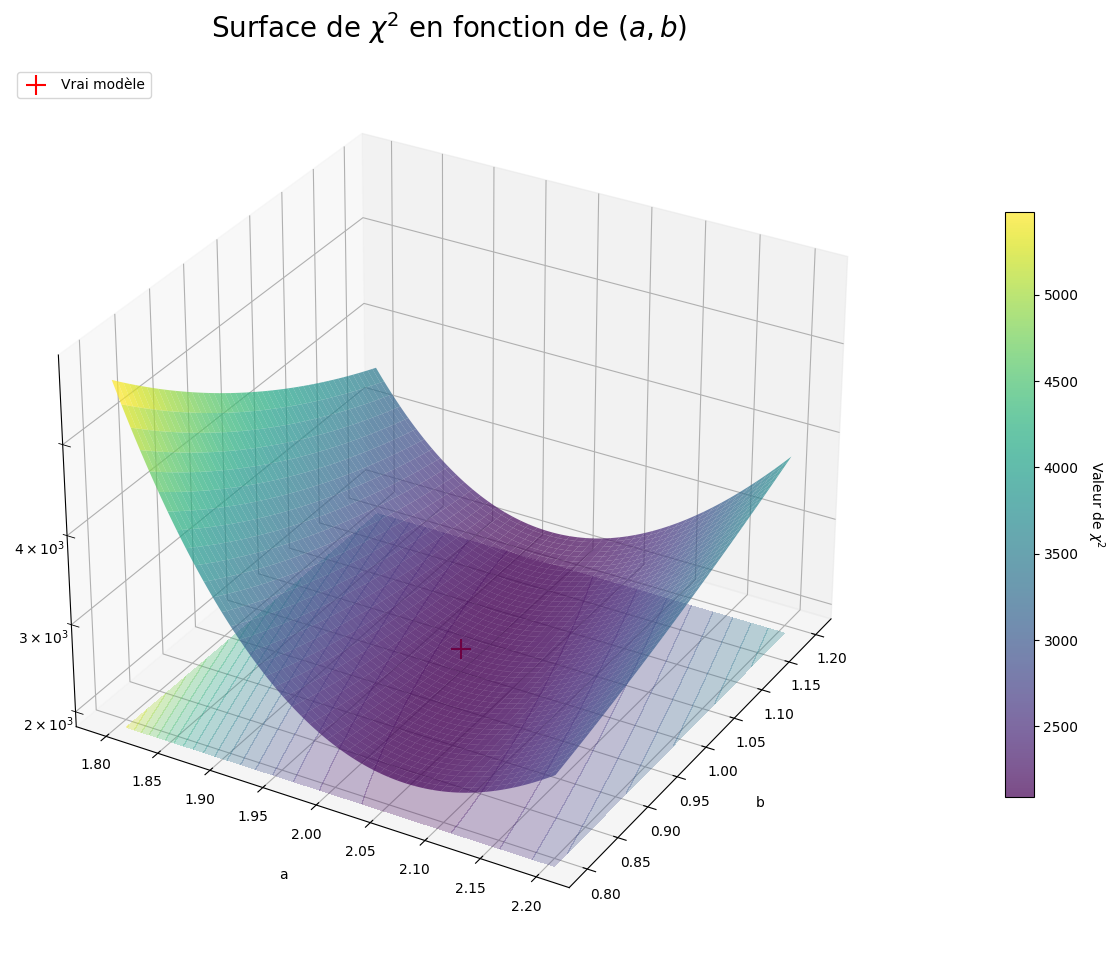

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Surface principale avec transparence et carte de contours
surf = ax.plot_surface(A, B, chi2_tab, cmap='viridis', alpha=0.7)
offset = np.min(chi2_tab) - 0.1*(np.max(chi2_tab)-np.min(chi2_tab))
ax.contourf(A, B, chi2_tab, zdir='z', offset=offset, cmap='viridis', alpha=0.3, levels=20)

# Marqueur pour indiquer les vrais paramètres du modèle
ax.scatter([2], [1], [np.min(chi2_tab)], s=200, c='red', marker='+', label='Vrai modèle')

# Paramètres visuels : échelle semi-logarithmique et ordonnancement des axes
ax.set_zscale('log')
ax.zaxis._axinfo['juggled'] = (1,2,0)

# Labels et légende
ax.set_xlabel('a', labelpad=15)
ax.set_ylabel('b', labelpad=15)
ax.set_zlabel('$\chi^2$ (échelle log)', labelpad=15)
ax.set_title('Surface de $\chi^2$ en fonction de $(a, b)$', pad=20, fontsize = 20)
cbar = fig.colorbar(surf, shrink=0.5, aspect=20, pad=0.1)
cbar.set_label('Valeur de $\chi^2$', rotation=270, labelpad=20)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

Nous observons, comme attendu, que les valeurs **minimales** de $\chi^2$ s'articulent autour de $a = 2$ et $b = 1$. Cela signifie que l'écart entre les valeurs expérimentales $y_i$ et le modèle théorique $y_{th}$ est le plus faible pour ces paramètres. Autrement dit, ces valeurs minimisent l'erreur globale entre les données observées et celles prédites par le modèle.  

Dans le cadre de la **méthode des moindres carrés**, cette minimisation de $\chi^2$ est essentielle : elle garantit un ajustement optimal du modèle affine en réduisant les écarts quadratiques résiduels. Le fait que le minimum de $\chi^2$ semble correspondre aux valeurs théoriques nous rapproche d'une validation expérimentalement du modèle, c'est-à-dire confirmant que les données suivent bien une tendance linéaire conforme aux paramètres imposés.  

La surface représentée illustre clairement cette convergence. Elle présente une structure en cuvette avec un minimum bien défini, ce qui indique une bonne stabilité de l’ajustement. Si la vallée de $\chi^2$ était trop large ou trop plate, plusieurs paires de paramètres $(a, b)$ conviendraient, rendant l’estimation plus incertaine. Or, nous constatons que $\chi^2$ augmente rapidement dès que l’on s’éloigne du minimum, traduisant une forte dépendance de l’erreur aux variations de a et b. Cette sensibilité témoigne de la robustesse du modèle et de la précision de l’ajustement obtenu.

Afin d'en avoir le coeur net, représentons la **distribution** des paramètres d'ajustement a et b sur deux histogrammes.

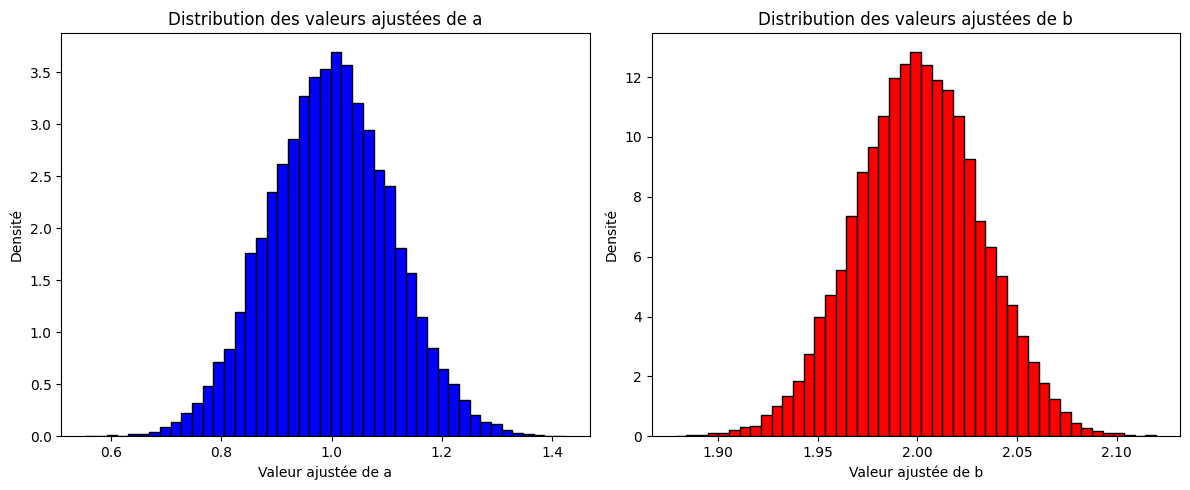

Le coefficient a appartient à l'intervalle [0.888, 1.109]
Le coefficient b appartient à l'intervalle [1.969, 2.032]


In [18]:
import scipy.optimize as opt

# Nombre d'expériences et création des tableaux de stockage des paramètres
nombre_experiences = 15000
fit_a = np.zeros(nombre_experiences)
fit_b = np.zeros(nombre_experiences)

# Génération de 10 000 expériences
for i in range(nombre_experiences):
    x_exp, y_exp, _ = gen_data(150, 2, 1, sigma)

    # Calcul de y_th pour chaque expérience et ajustement du modèle
    y_th = model(2, 1, x_exp)
    parametres_opt, _ = opt.curve_fit(model, x_exp, y_exp, sigma=0.1*y_th)


    # Stockage des résultats ajustés
    fit_a[i], fit_b[i] = parametres_opt

# Tracé des histogrammes pour a et b
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(fit_a, bins=45, ec='k', density=True, color='blue')
axes[0].set_xlabel("Valeur ajustée de a")
axes[0].set_ylabel("Densité")
axes[0].set_title("Distribution des valeurs ajustées de a")

axes[1].hist(fit_b, bins=45, ec='k', density=True, color='red')
axes[1].set_xlabel("Valeur ajustée de b")
axes[1].set_ylabel("Densité")
axes[1].set_title("Distribution des valeurs ajustées de b")

plt.tight_layout()
plt.show()

# Calcul des moyennes et écarts-types et affichage des intervalles de confiance à 68%
moyenne_a = np.mean(fit_a)
ecart_type_a = np.std(fit_a)
moyenne_b = np.mean(fit_b)
ecart_type_b = np.std(fit_b)

print(f"Le coefficient a appartient à l'intervalle [{moyenne_a - ecart_type_a:.3f}, {moyenne_a + ecart_type_a:.3f}]")
print(f"Le coefficient b appartient à l'intervalle [{moyenne_b - ecart_type_b:.3f}, {moyenne_b + ecart_type_b:.3f}]")

La représentation montre des distributions gaussiennes d'écart-type faible, bien **centrées** autour de leur valeur théorique.


### e) Crédibilité du modèle via $\chi^2$

Lors du calcul de $\chi^2$ en fonction de nos paramètres affines, plusieurs cas de figure s'offrent à nous. Considérons $n$ le nombre d'échantillons de données et $p$ le nombre de paramètres nécessaires à la caractérisation du modèle (dans notre cas, a et b constituent les 2 seuls paramètres du modèle) :

- si n < p, le modèle est surparamétré. Il y a plus de paramètres que de données et le modèle ne peux donc pas être trouvé ;

- si n = p, il y a autant de paramètres que de données. Le modèle correct peut être trouvé, mais rien ne garantit que le modèle obtenu est le bon.

- si n > p, il y a plus de données que de paramètres. Le juste modèle peut ainsi être déterminé et on peut calculer $\chi^2$. 

En comparant $\chi^2$ à $n-p$, nous pouvons tirer les conclusions suivantes :
- Si $\chi^2$ est proche de n-p, le modèle est bon ;
- Si $\chi^2$ est très grand, le modèle proposé est mauvais.

Nous pouvons reformuler ces implications en utilisant le facteur $\chi^2$ réduit, défini par :

$$\chi^2_{red} = \frac{\chi^2}{n - p}$$

- Si $\chi^2_{red} \approx 1$, le modèle est crédible.
- Si $\chi^2_{red} \gg 1$, le modèle ne décrit pas bien les données.
- Si $\chi^2_{red} \ll 1$, les incertitudes sont surestimées ou le modèle sur-ajusté.

Ainsi, pour qu'un modèle soit statistiquement valide, $\chi^2_{red}$ doit être **proche de 1**. Cela garantit que le modèle explique les données **sans être trop rigide ni trop flexible**.

<hr style="border: none; height: 3px; background-color: grey;">

## IV. Détermination des incertitudes

Afin de calculer les incertitudes liées à la détermination de ces paramètres, nous utiliserons un autre outil probant, $\Delta\chi^2 = \chi^2 - \chi^2_{min}$, où $\chi^2_{min}$ est la valeur minimale de $\chi^2$ en fonction de $a$ et $b$. Pour 2 paramètres, nous avons les équivalences suivantes : 

- $\Delta\chi^2 \leq 2.3$ correspond à un intervalle de confiance à 68% ($1-\sigma$) ;
- $\Delta\chi^2 \leq 6.17$ correspond à un intervalle de confiance à 95.4% ($1-2\sigma$) ;
- $\Delta\chi^2 \leq 11.8$ correspond à un intervalle de confiance à 99.73% ($1-3\sigma$).

Débutons d'abord par la représentation graphique des courbes de niveau de $\Delta\chi^2$ spécifiées ci-dessus :

<>:34: SyntaxWarning: invalid escape sequence '\D'
<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\D'
<>:35: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_3897/2065533570.py:34: SyntaxWarning: invalid escape sequence '\D'
  ax.set_zlabel("$\Delta\chi^2$")
/tmp/ipykernel_3897/2065533570.py:35: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title("Surface $\Delta\chi^2$ avec plans horizontaux et courbes d'intersection")


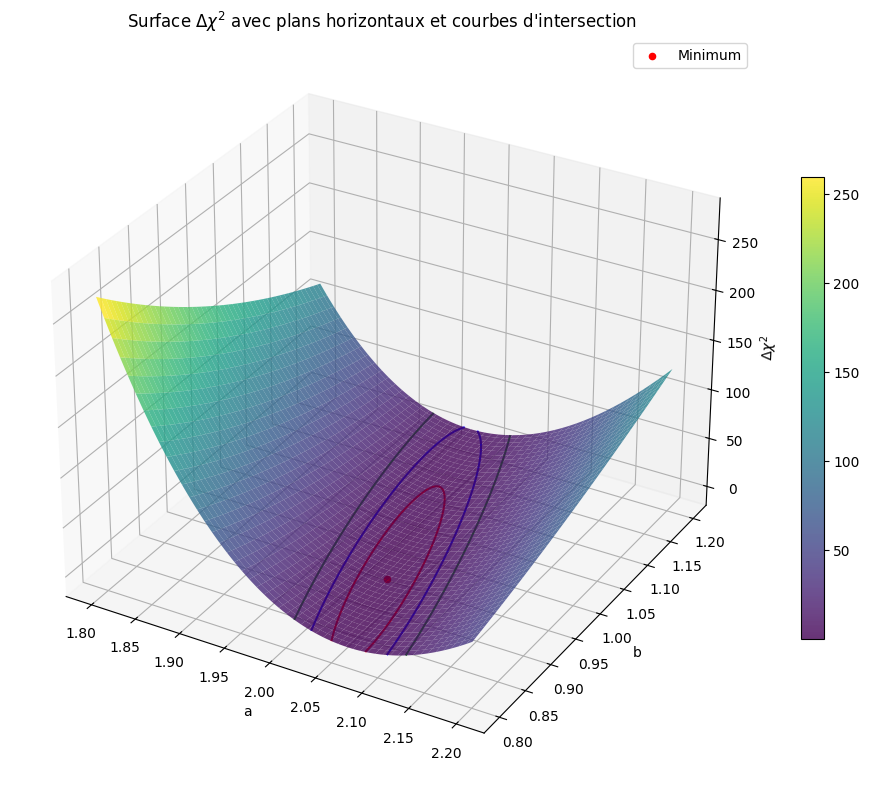

In [19]:
# Calcul de chi2 et Deltachi2 pour chaque couple (a, b)
chi2_vals = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        y_model = model(A[i, j], B[i, j], x_exp)
        chi2_vals[i, j] = chi_2(y_model, y_exp)

chi2_min = np.min(chi2_vals)
delta_chi2 = chi2_vals - chi2_min

# Représentation graphique de Deltachi2 et des courbes de niveau
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Définition des niveaux et couleurs pour les courbes de niveau
niveaux = [2.3, 6.17, 11.8]
couleurs = ['r', 'b', 'g']

surface = ax.plot_surface(A, B, delta_chi2, cmap='viridis', ec='none', alpha=0.8)
fig.colorbar(surface, shrink=0.5)

# Indication du minimum
minimum = np.unravel_index(np.argmin(delta_chi2), delta_chi2.shape)
ax.scatter(A[minimum], B[minimum], delta_chi2[minimum], color='r', label='Minimum')

# Tracé des courbes de niveau
for niveau, couleur in zip(niveaux, couleurs):
    plane = np.full_like(A, niveau)
    ax.plot_surface(A, B, plane, color='gray', alpha = 0)
    ax.contour(A, B, delta_chi2, levels=[niveau], colors=couleur)

ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("$\Delta\chi^2$")
ax.set_title("Surface $\Delta\chi^2$ avec plans horizontaux et courbes d'intersection")
ax.legend()
plt.show()

Finalement, représentons la projection des **courbes de niveau** en fonction des paramètres a et b sur un graphe plan.

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_3897/2447536163.py:8: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Courbes d'intersection $(a, b)$ pour différents niveaux de $\Delta\chi^2$")


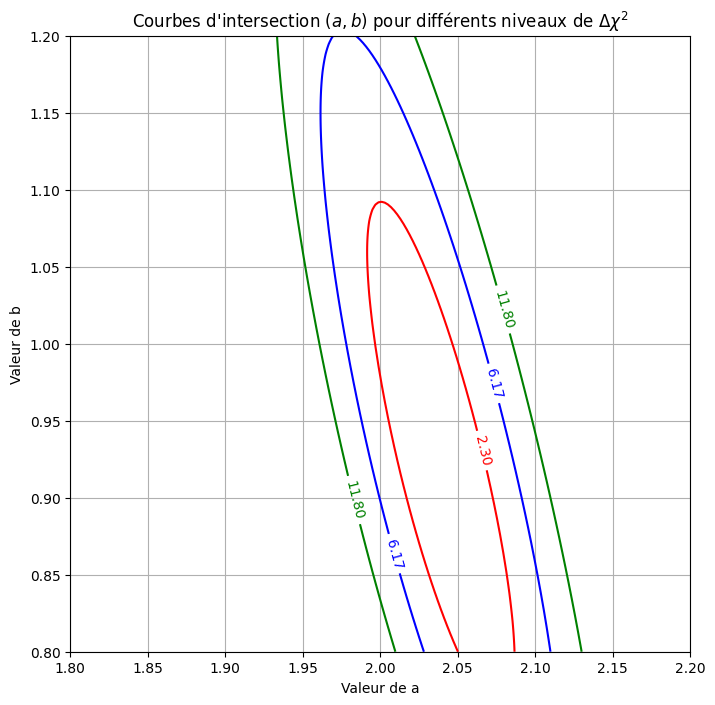

In [20]:
plt.figure(figsize=(8, 8))

# Tracé des courbes de niveau
contours = plt.contour(A, B, delta_chi2, levels=[2.3, 6.17, 11.8], colors=['r', 'b', 'g'])
plt.clabel(contours)
plt.xlabel("Valeur de a")
plt.ylabel("Valeur de b")
plt.title("Courbes d'intersection $(a, b)$ pour différents niveaux de $\Delta\chi^2$")
plt.grid()
plt.show()

Nous observons que, pour une grande partie des expériences générées, les valeurs théoriques de a et b se trouvent **de justesse ou non** dans l'intervalle de confiance $1-\sigma$, c'est-à-dire l'intervalle dans lequel les données expérimentales ont 68% d'être comprises. Cette déviation est liée à un paramètre statistique que nous n'avons pas pris en compte dans notre raisonnement : la forte **corrélation** négative entre a et b (lorsque a augmente, b diminue, et inversement), visible par les ellipses allongées et inclinées que les courbes de niveau de $\Delta\chi^2$ forment. Ce facteur induit une **sous-estimation** des incertitudes sur ces derniers, rendant les intervalles de confiance univariés **biaisés**.